# **Aprendizado de Máquina** <BR>**Aula 06** - Hiperparâmetros, validação cruzada e classificador *SVM*# **Aprendizado de Máquina** <BR>**Aula 06** - Hiperparâmetros, validação cruzada e classificador *SVM*

# **Exercício 2**. Classificação de origens de automóveis (com normalização de atributos) usando classificador *SVM*.

## **1)** Importação de bibliotecas e classes

In [ ]:
# Bibliotecas de uso geral (cálculos, manipulação de dados e geração de gráficos)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Bibliotecas específicas de Machine Learning
from sklearn.model_selection import train_test_split    # Divisão de dados (treino/teste)
from sklearn.model_selection import cross_val_score     # Validação cruzada k-folds
#from sklearn.linear_model import LogisticRegression     # Regressão logística
from sklearn.svm import SVC                             # Classificador SVM

from sklearn.metrics import accuracy_score    # Cálculo da acurácia
from sklearn.metrics import confusion_matrix  # Matriz de confusão "básica"
from sklearn.metrics import ConfusionMatrixDisplay  # Matriz de confusão "aprimorada"
from sklearn.metrics import classification_report   # Relatório de métricas
from sklearn.metrics import RocCurveDisplay         # Curva ROC

## **2)** Leitura de dados e exploração inicial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# OBSERVAÇÕES: "monte" o disco e ajuste o caminho
# do arquivo de dados antes da executar esta célula!

caminho_arquivo = "/content/drive/MyDrive/Colab Notebooks/Aula2_ML/A02Ex1_carros.csv"
df = pd.read_csv(caminho_arquivo)
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,USA,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,USA,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger


### **2.1)** Características gerais

In [ ]:
# Contagem de classes da resposta/target
df['origin'].value_counts()

,count
origin,
USA,245
Asia,79
Europe,68


## **3)** Pré-processamento e seleção de variáveis

### **3.1)** Seleção de atributos e resposta


In [ ]:
X = df.drop(columns = ['origin', 'car name'])  # Atributos: todos, exceto origens e nome
y = df['origin']                                         # Resposta/target: origem binária

In [ ]:
# Checagem dos atributos
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


### **3.2)** Divisão dos dados de treino e teste

In [ ]:
# Parâmetros da função 'train_test_split':
#   X,y = arrays (ou equivalentes) das variáveis independentes (X) e dependente (y)
#   train_size/test_size = percentual de dados de treino/teste. Padrão: 75% (treino) e 25% (teste)
#   random_state = controle da aleatoriedade da divisão (valor inteiro)
#     IMPORTANTE: sem o controle do parâmetro 'random_state', diferentes partições
#     do conjunto de dados serão retornadas a cada execução da função de divisão
#   stratify: variável que define a estratificação de classes a ser mantida
#
# Retorno:
#   Tupla (4 valores) dos atributos de treino e teste e respostas (idem)

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, random_state = 42,
                                                        stratify = y)

### **3.3)** Normalização de atributos

In [ ]:
# Padronização dos dados (atributos) de treino e teste
# segundo a média e o desvio padrão do conjunto de TREINO

# Importação da biblioteca necessária para padronização de atributos
from sklearn.preprocessing import StandardScaler

# Criação de instância e treinamento de um objeto "escalonador"
escalonador = StandardScaler()
escalonador.fit(X_treino)

# Padronização dos dados de treino e teste
X_treino_Padr = escalonador.transform(X_treino)
X_teste_Padr = escalonador.transform(X_teste)

# Conversão dos conjuntos padronizados (arrays) em DataFrames
X_treino_Padr = pd.DataFrame(data = X_treino_Padr, columns = X_treino.columns)
X_teste_Padr = pd.DataFrame(data = X_teste_Padr, columns = X_treino.columns)

In [ ]:
# checagem dos dados padronizados
X_treino_Padr.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-1.169472,1.440857,1.137095,1.111028,1.417813,-0.370424,-0.793401
1,-1.042233,0.289737,0.497374,-0.156108,0.377715,0.523703,-0.522169
2,-0.978614,1.440857,1.447547,0.908286,1.206561,-0.441954,0.833994
3,-0.507830,0.289737,0.318628,-0.029394,0.607437,1.310535,0.562761
4,-0.787755,1.440857,0.591450,0.097319,1.213488,1.239005,0.291529


In [ ]:
# Resumo estatístico dos dados padronizados
X_treino_Padr.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02
mean,-5.256566e-16,7.250436e-17,1.812609e-17,-1.450087e-16,6.646233e-17,-2.779334e-16,-7.461907e-16
std,1.001705e+00,1.001705e+00,1.001705e+00,1.001705e+00,1.001705e+00,1.001705e+00,1.001705e+00
min,-1.805666e+00,-1.436941e+00,-1.196004e+00,-1.473929e+00,-1.611286e+00,-2.516330e+00,-1.607099e+00
25%,-8.513748e-01,-8.613817e-01,-8.479211e-01,-7.643328e-01,-8.782535e-01,-6.923101e-01,-7.934011e-01
50%,-1.515613e-01,-8.613817e-01,-4.339842e-01,-2.828212e-01,-2.150607e-01,-1.277325e-02,2.029631e-02
75%,7.391104e-01,1.440857e+00,9.865721e-01,6.421878e-01,7.358620e-01,5.862922e-01,8.339938e-01
max,2.724036e+00,1.440857e+00,2.425944e+00,3.011731e+00,2.460221e+00,3.313381e+00,1.647691e+00


## **4)** Treinamento do <u>classificador</u> (modelo SVM)

In [ ]:
clf_SVC = SVC()                      # Cria instância de um classificador [por] SVM
clf_SVC.fit(X_treino_Padr,y_treino)  # Treina o classificador


SVC()

## **5)** Validação cruzada *hold-out*

### **5.1)** Avaliação <u>preliminar</u> do classificador via acurácia de ressubstituição

In [ ]:
# Importação da biblioteca necessária para o cálculo da acurácia
from sklearn.metrics import accuracy_score

# Cálculo das previsões do classificador para os dados de treino (ressubstituição)
y_prev_treino = clf_SVC.predict(X_treino_Padr)

# Acurácia "preliminar" (ressubstituição)
acc_prelim = accuracy_score(y_true = y_treino,y_pred = y_prev_treino)
print("Acurácia preliminar (dados de treino) =",acc_prelim)

Acurácia preliminar (dados de treino) = 0.7755102040816326


### **5.2)** Avaliação da capacidade de generalização via acurácia de teste

In [ ]:
# Cálculo das previsões do classificador para os dados de treino (ressusbstituição)
y_prev_teste = clf_SVC.predict(X_teste_Padr)

# e a acurácia correspondente
y_prev_teste = clf_SVC.predict(X_teste_Padr)
acc_teste = accuracy_score(y_true = y_teste,y_pred = y_prev_teste)
print("Acurácia =",acc_teste)

Acurácia = 0.7653061224489796


### **5.3)** Matriz de confusão e relatório de métricas

In [ ]:
# Exibição "básica" da matriz de confusão
# Importação da função de cálculo
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_teste,y_pred = y_prev_teste)

array([[13,  5,  2],
       [ 7,  7,  3],
       [ 3,  3, 55]])

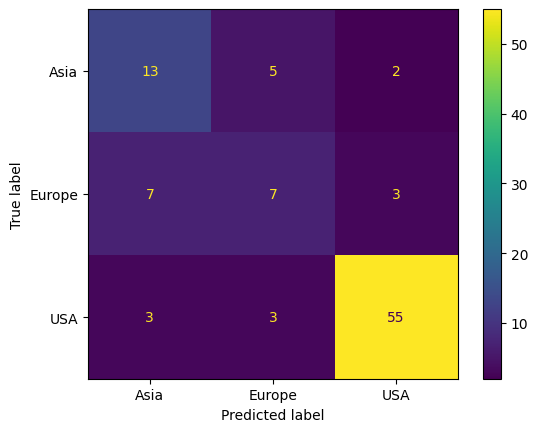

In [ ]:
# Representação "gráfica" da matriz de confusão
# Importação da função de exibição
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true = y_teste,
                                        y_pred = y_prev_teste)
plt.show()

In [ ]:
# Relatório das métricas de qualidade
from sklearn.metrics import classification_report

print(classification_report(y_true = y_teste,y_pred = y_prev_teste,digits = 4))

              precision    recall  f1-score   support

        Asia     0.5652    0.6500    0.6047        20
      Europe     0.4667    0.4118    0.4375        17
         USA     0.9167    0.9016    0.9091        61

    accuracy                         0.7653        98
   macro avg     0.6495    0.6545    0.6504        98
weighted avg     0.7669    0.7653    0.7652        98



## **6)** Validação k-folds

### **6.1)** Definição do *pipeline*

In [ ]:
# Importação da biblioteca que implementa o pipeline
from sklearn.pipeline import Pipeline

# Definição dos passos do pipeline
pipe = Pipeline(steps = [('escalonador',StandardScaler()),
                        ('classificador',SVC())]
                )
display(pipe)


Pipeline(steps=[('escalonador', StandardScaler()), ('classificador', SVC())])

In [ ]:
# Importação da bilioteca necessária
from sklearn.model_selection import cross_val_score

# Parâmetros da função 'cross_val_score':
#   estimator = estimador de alguma classe reconhecida (Scikit-Learn)
#   X,y = atributos (X) e resposta (y)
#   cv = número [inteiro] de partições (k); valor padrão: k = 5
#   scoring = texto indicativo da métrica de qualidade a ser calculada (teste)
#     https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-string-names
#
# Retorno:
#   array (Numpy) com os k valores da métrica selecionada

# Executa a validação cruzada k-folds, com k = 5, avaliando a métrica de acurácia
aval = cross_val_score(estimator = pipe,
                       X = X_treino,
                       y = y_treino,
                       cv = 5,
                       scoring = 'accuracy')

# Calcula o coeficiente de variação das avaliações = desvio padrão/média
# Critério:
# Até 20%: variação baixa
# De 20% a 60%: variação moderada
# Acima de 60%: variação alta

print("Valores de acurácia obtidos:",aval)
print("")   # "Imprime" uma linha em branco
print("Acurácia média =",aval.mean())
print("Coeficiente de variação (%) =",100*aval.std(ddof = 1)/aval.mean())

Valores de acurácia obtidos: [0.6779661  0.6440678  0.69491525 0.71186441 0.79310345]

Acurácia média = 0.7043834015195791
Coeficiente de variação (%) = 7.889362402376868


### **6.2)** Busca em grade para os hiperparâmetros *C* e *gamma*


In [ ]:
# Importação da biblioteca necessária para a busca em grade
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definição da grade de busca: dicionário de valores
DicGradeHP = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.01, 0.1, 1, 10, 100, 1000]
              }

In [ ]:
# Criação da grade
GradeBusca = GridSearchCV(estimator = clf_SVC,
                          param_grid = DicGradeHP,
                          cv = 5,
                          scoring = 'accuracy',
                          verbose = 0)

# Busca na grade
GradeBusca.fit(X_treino_Padr,y_treino)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
# Exibição da melhor solução encontrada
print("Melhor solução encontrada:")
print(GradeBusca.best_estimator_)

Melhor solução encontrada:
SVC(C=100, gamma=0.1)


In [ ]:
# Melhores (hi)parâmetros
print("Melhores parâmetros:")
print(GradeBusca.best_params_)

Melhores parâmetros:
{'C': 100, 'gamma': 0.1}


In [ ]:
# Opção para obter os valores 'ótimos' de 'C' e 'gamma'
print("Valor 'ótimo' de C =",GradeBusca.best_params_['C'])
print("Valor 'ótimo' de gamma =",GradeBusca.best_params_['gamma'])

Valor 'ótimo' de C = 100
Valor 'ótimo' de gamma = 0.1


In [ ]:
# Exibição do melhor 'score'
print("Melhor score =",max(GradeBusca.cv_results_['mean_test_score']))


Melhor score = 0.7790765634132086


### **6.3)** Resultados finais

In [ ]:
# Treinamento final do modelo, com hiperparâmetros ajustados
clf_SVC = SVC(C = GradeBusca.best_params_['C'],
              gamma = GradeBusca.best_params_['gamma'])
clf_SVC.fit(X_treino_Padr,y_treino)

# Previsões para os dados de teste
y_prev_teste = clf_SVC.predict(X_teste_Padr)

# Cálculo da acurácia "final" (dados de teste)
acc_final = accuracy_score(y_true = y_teste,y_pred = y_prev_teste)
print("Acurácia final (dados de teste) =",acc_final)

Acurácia final (dados de teste) = 0.7857142857142857
